#DIGIT RECOGNIZER - CNN
###pengenalan angka menggunakan model Convolutional Neural Network (CNN) sederhana 1 layer

In [1]:
# upload file
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


# DATA UNDERSTANDING

In [50]:
# import modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
from keras.utils import np_utils
from keras.datasets import mnist

from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense

In [3]:
# read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# tampilkan train
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# deskripsi train
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [6]:
# info train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
# ukuran train
train.shape

(42000, 785)

In [8]:
# train label value_count
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [9]:
# tampilkan test
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# deskripsi test
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001357,0.012500,0.016786,0.031714,0.056000,0.100464,0.166929,...,3.272536,2.371464,1.454357,0.846286,0.509750,0.254750,0.062107,0.015250,0.000786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005429,0.024179,0.036250,0.083143,0.134107,0.201071,0.325000,0.366714,0.468143,0.589429,0.656964,0.569714,0.464214,0.323679,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227093,1.566275,1.513515,2.674449,3.216234,4.549478,5.470524,...,25.211706,21.240003,16.643468,12.637953,9.963879,7.031504,3.040514,1.265562,0.131475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640468,2.234963,2.493982,3.777711,4.946940,6.262819,7.714814,8.243535,8.974038,10.488695,11.209508,10.204173,9.402197,7.878854,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [11]:
# info test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [12]:
# ukuran test
test.shape

(28000, 784)

# DATA VISUALIZATION

### Tentukan nilai x dan y dari train dan test

In [13]:
# tentukan variabel dependen y_train yaitu train label
y_train = train['label']
# tentukan variabel x_train yaitu seluruh kolom dalam train kecuali kolom label
X_train = train.drop(labels=['label'], axis=1)
# tentukan x_test yaitu semua nilai dalam test
X_test = test

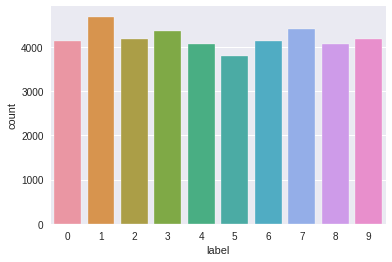

In [14]:
# countplot y_train
sns.countplot(y_train)

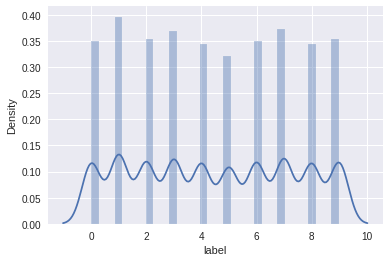

In [15]:
# plot distribusi y_train
sns.distplot(y_train)

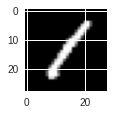

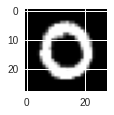

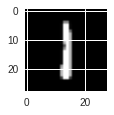

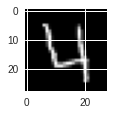

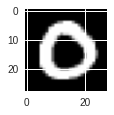

In [16]:
# plot gambar tabel X_train dari range index 0-5
for i in range(0,5):
    # index pada tiap baris X_train akan bertambah 1, dan reshape tiap baris X_train menjadi 28x28 pixel
    digit=(X_train.iloc[i:i+1,:].to_numpy()).reshape(28,28)
    # atur ukuran gambar 
    plt.figure(figsize=(1.5,1.5))
    #tampilkan gambar
    plt.imshow(digit, 'gray')

In [17]:
# cocokan 5 gambar yang terlihat dari plot, dengan 5 nilai dari y_train
y_train.head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

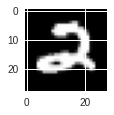

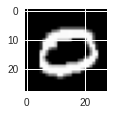

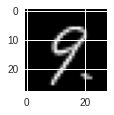

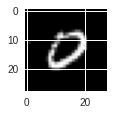

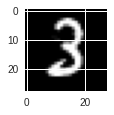

In [18]:
# plot gambar tabel X_test dari range index 0-5
for i in range(0,5):
    # index pada tiap baris X_test akan bertambah 1, dan reshape tiap baris X_test menjadi 28x28 pixel
    digit=(X_test.iloc[i:i+1,:].to_numpy()).reshape(28,28)
    # atur ukuran gambar 
    plt.figure(figsize=(1.5,1.5))
    #tampilkan gambar
    plt.imshow(digit, 'gray')

# DATA PREPARATION

### HANDLING MISSING VALUE

In [19]:
# cek misiing value pada train
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [20]:
# cek misiing value pada test
test.isnull().sum()[test.isnull().sum()>0]

Series([], dtype: int64)

In [21]:
# cek misiing value pada X_train
X_train.isnull().sum()[X_train.isnull().sum()>0]

Series([], dtype: int64)

In [22]:
# cek misiing value pada X_test
X_test.isnull().sum()[X_test.isnull().sum()>0]

Series([], dtype: int64)

In [23]:
# cek misiing value pada y_train
y_train.isnull().sum()[y_train.isnull().sum()>0]

array([], dtype=int64)

### DATA NORMALIZATION
karena X_train dan X_test tidak berdistribusi normal, maka X_train dan X_test harus di trainsformasi dengan membagikan nilai X_train dan X_test dengan 255. Dimana 255 merupakan nilai pixel dari tiap gambar yaitu atara 0-255 menjadi antara 0-1.

In [24]:
# normalisasi X_train
X_train = X_train / 255
# normalisasi X_test
X_test = X_test / 255

In [25]:
# tampilkan X_train yg telah dinormalisasi
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# tampilkan X_test yang telah dinormalisasi
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.988235,0.078431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### DATA FORMATING

In [27]:
# ubah type data X_train menjadi float32
X_train = X_train.values.astype('float32')
# ubah type data y_train menjadi integer 
y_train = y_train.values.astype('int32')
# ubah type data X_test menjadi float32 
X_test = test.values.astype('float32') 

In [28]:
# cek ukuran data
print('Ukuran X_train : ', X_train.shape)
print('Ukuran y_train : ', y_train.shape)
print('Ukuran X_test  : ', X_test.shape)

Ukuran X_train :  (42000, 784)
Ukuran y_train :  (42000,)
Ukuran X_test  :  (28000, 784)


Convert nilai y_train dengan menggunakan metode one-hot menjadi matriks biner yang memiliki ukuran 1x9 karena nilai y_train berada diantara 0-9, yang berbentuk
*  y_train bernilai 1 hasil convert [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
*  y_train bernilai 0 hasil convert [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
*  y_train bernilai 1 hasil convert [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
*  y_train bernilai 4 hasil convert [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
*  y_train bernilai 0 hasil convert [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [29]:
# tampilkan train['label]
train['label'].head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [30]:
# convert y_train menjadi matriks binery 
Y_train = np_utils.to_categorical(y_train)
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [31]:
# cek ukuran dalam tiap matriksnya
Y_train.shape[1]

10

In [32]:
# recek ukuran y_train dan Y_train
print('Ukuran y_train :', y_train.shape)
print('Ukuran Y_train :', Y_train.shape)

Ukuran y_train : (42000,)
Ukuran Y_train : (42000, 10)


### SPLIT DATA 
split/bagi data X_train dan Y_train menjadi 80% data training dan 20% data validation

In [33]:
# split data train menjadi 80 data traini dan 20% data validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.10, random_state=7)

In [34]:
# recek kembali ukuran data yang telah displit
print('Ukuran X_train :', X_train.shape)
print('Ukuran X_val   :', X_val.shape)
print('Ukuran Y_train :', Y_train.shape)
print('Ukuran Y_val   :', Y_val.shape)

Ukuran X_train : (37800, 784)
Ukuran X_val   : (4200, 784)
Ukuran Y_train : (37800, 10)
Ukuran Y_val   : (4200, 10)


In [35]:
# tampilkan Y_val
Y_val

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [36]:
# kembalikan nilai Y_val yang telah dikonvert menggunakan metode one-hot kedalam bentuk awal
y_val = np.argmax(Y_val, 1)
y_val


array([1, 1, 4, ..., 0, 2, 2])

# MODELING
https://machinelearning.mipa.ugm.ac.id/2018/09/30/klasifikasi-gambar-sederhana-menggunakan-convolutional-neural-network/

### Model Convolutional neural networks (CNN) Sederhana
buat model CNN sederhana dengan hanya menggunakan 1 layer

In [37]:
# banyak kolom X_train
num_pixels = X_train.shape[1]
num_pixels

# definisikan sebuah fungsi untuk model sederhana
def baseline_model():
    # buat model CNN dengan metode Sequential
    model = Sequential()
    # atur dense untuk mengatur connection neural network dari model
    model.add(Dense(784, input_dim=784, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
    # compile model agar menampilkan loss function dan perfoma model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [55]:
# fit model dengan menggunakan 15 iterasi dan dan batch size 200
model = baseline_model()
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=15, batch_size=200, verbose=1)

Epoch 1/15
189/189 [==============================] - 4s 17ms/step - loss: 0.5981 - accuracy: 0.8309 - val_loss: 0.1754 - val_accuracy: 0.9517
Epoch 2/15
189/189 [==============================] - 3s 14ms/step - loss: 0.1442 - accuracy: 0.9605 - val_loss: 0.1281 - val_accuracy: 0.9643
Epoch 3/15
189/189 [==============================] - 2s 13ms/step - loss: 0.0914 - accuracy: 0.9741 - val_loss: 0.1045 - val_accuracy: 0.9724
Epoch 4/15
189/189 [==============================] - 3s 13ms/step - loss: 0.0618 - accuracy: 0.9826 - val_loss: 0.0948 - val_accuracy: 0.9738
Epoch 5/15
189/189 [==============================] - 2s 13ms/step - loss: 0.0468 - accuracy: 0.9871 - val_loss: 0.0868 - val_accuracy: 0.9745
Epoch 6/15
189/189 [==============================] - 2s 13ms/step - loss: 0.0327 - accuracy: 0.9922 - val_loss: 0.0823 - val_accuracy: 0.9786
Epoch 7/15
189/189 [==============================] - 2s 13ms/step - loss: 0.0242 - accuracy: 0.9946 - val_loss: 0.0788 - val_accuracy: 0.9790

In [56]:
# cetak seluruh nilai pada model yang di fit 
history_dict = history.history
history_dict


{'accuracy': [0.9041534662246704,
  0.9608200788497925,
  0.9746031761169434,
  0.9822221994400024,
  0.9870370626449585,
  0.9914814829826355,
  0.9944179654121399,
  0.9961375594139099,
  0.9973280429840088,
  0.9984126687049866,
  0.9992592334747314,
  0.999656081199646,
  0.9998677372932434,
  0.9998677372932434,
  1.0],
 'loss': [0.3384561836719513,
  0.1371149867773056,
  0.09008914977312088,
  0.06282202154397964,
  0.04615103080868721,
  0.0339830256998539,
  0.02474885620176792,
  0.01836409978568554,
  0.014418433420360088,
  0.010384481400251389,
  0.007484870962798595,
  0.00587762426584959,
  0.004015249200165272,
  0.0033063197042793036,
  0.002414340153336525],
 'val_accuracy': [0.9516666531562805,
  0.9642857313156128,
  0.9723809361457825,
  0.973809540271759,
  0.9745237827301025,
  0.9785714149475098,
  0.9790475964546204,
  0.9797618985176086,
  0.9795238375663757,
  0.9811905026435852,
  0.9811905026435852,
  0.9783333539962769,
  0.9800000190734863,
  0.9811905026

In [57]:
# Cetak kunci dari setiap nilai dari model yang difitkan 
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

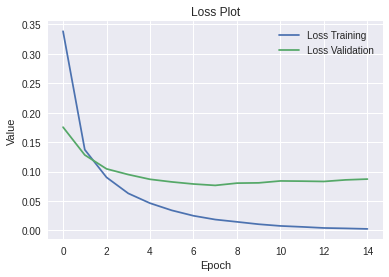

In [58]:
# plot fungsi validasi dari y_val dan predicted
plt.plot(history.history['loss'], label = 'Loss Training')
plt.plot(history.history['val_loss'], label = 'Loss Validation')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()


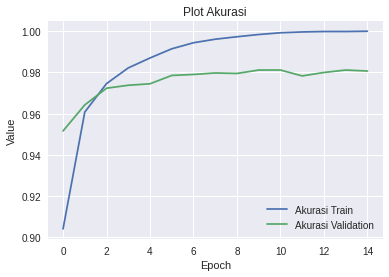

In [59]:
# plot tingkat akurasi dari y_val dan predicted
plt.plot(history.history['accuracy'], label = 'Akurasi Train')
plt.plot(history.history['val_accuracy'], label = 'Akurasi Validation')
plt.title('Plot Akurasi')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

In [39]:
# tentang model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Evaluasi Model
Evaluasi model yang dihasilkan dengan menggunkan medel CNN sederhana

In [40]:
# Evaluasi model CNN sederhana yang dihasilkan
scores = model.evaluate(X_val, Y_val, verbose=0)
print ('nilai skor dan akurasi model :',scores)
print ('Score model                  :',format(scores[0]))
print ('Accuracy model               :',format(scores[1]))

nilai skor dan akurasi model : [0.08286215364933014, 0.9807142615318298]
Score model                  : 0.08286215364933014
Accuracy model               : 0.9807142615318298


## Koreksi hasil prediksi 
Koreksi hasil prediksi yang dihasilkan dengan menggunakan model CNN sederhana dengan menggunakan data validation yaitu X_val apakah hasil yang diberikan bebar atau salah.

In [41]:
# definisikan variabel predicted_classes yang berisi nilai yang akan diprediksi
predicted = model.predict_classes(X_val)
predicted

array([1, 1, 4, ..., 0, 2, 2])

In [42]:
# indeks hasil prediksi yang bernilai sama dengan nilai y_val, atau dapat dikatakan prediksinya bebar
correct = np.nonzero(np.equal(predicted, y_val))[0]
correct

array([   0,    1,    2, ..., 4197, 4198, 4199])

In [43]:
# banyanya prediksi yang benar
len(correct)

4119

In [44]:
# # indeks hasil prediksi yang nilainya tidak sama dengan nilai y_val, atau dapat dikatakan prediksinya salah
incorrect = np.nonzero(np.not_equal(predicted, y_val))[0]
incorrect

array([  89,  275,  334,  406,  449,  530,  603,  626,  696,  782,  827,
        882,  884, 1015, 1128, 1203, 1232, 1250, 1376, 1394, 1459, 1471,
       1518, 1657, 1679, 1738, 1929, 1942, 2044, 2045, 2064, 2154, 2263,
       2282, 2308, 2369, 2370, 2372, 2391, 2406, 2436, 2455, 2494, 2594,
       2701, 2753, 2825, 2840, 2888, 2916, 2917, 2953, 3005, 3104, 3126,
       3145, 3157, 3164, 3189, 3202, 3223, 3261, 3351, 3393, 3403, 3506,
       3513, 3546, 3641, 3686, 3702, 3736, 3760, 3878, 3883, 3922, 3933,
       4029, 4066, 4069, 4180])

In [45]:
# banyaknya prediksi yang salah
len(incorrect)

81

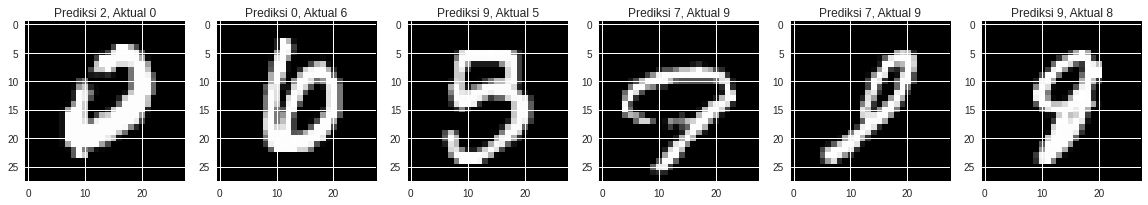

In [46]:
# plot gambar hasil prediksi yang bernilai salah

# atur ukuran gambar yaotu 16, 10
plt.figure(figsize=[20,8])
for i, incorrect in enumerate(incorrect[:6]):
    # tampilkan gambar 
    plt.subplot(1,6,i+1)
    # tampilkan gambar dengan ukuran 28x28 pixel dengan skala warna abu-abu
    plt.imshow(X_val[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    # atur judul 
    plt.title("Prediksi {}, Aktual {}".format(predicted[incorrect], y_val[incorrect]))

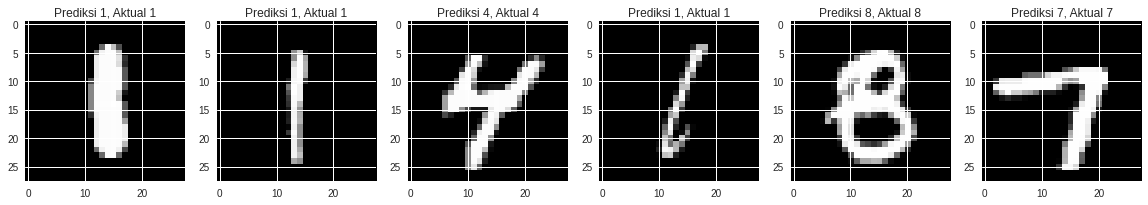

In [47]:
# plot gambar hasil prediksi yang bernilai bebar

# atur ukuran gambar yaotu 16, 10
plt.figure(figsize=[20,8])
for i, correct in enumerate(correct[:6]):
    # tampilkan gambar 
    plt.subplot(1,6,i+1)
    # tampilkan gambar dengan ukuran 28x28 pixel dengan skala warna abu-abu
    plt.imshow(X_val[correct].reshape(28,28), cmap='gray', interpolation='none')
    # atur judul 
    plt.title("Prediksi {}, Aktual {}".format(predicted[correct], y_val[correct]))

#Confution Matrix
bandingkan nilai sebenrnya dan hasil prediksi dengan menggunakan confusion matriks.

In [48]:
# nilai unik dalam y_train
class_names = np.unique(y_train)
class_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [51]:
# hitung matriks confusion dari y_val dan redicted
cnf_matrix = confusion_matrix(y_val, predicted)
np.set_printoptions(precision=2)

In [52]:
# cetan matriks confusion dari y_val dan Predicted dari 10 kelas yaitu 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
print (cnf_matrix)

[[427   0   1   0   0   0   0   0   0   1]
 [  0 494   2   0   0   0   0   1   0   1]
 [  0   0 422   1   1   0   1   6   1   1]
 [  1   0   1 432   0   1   0   3   3   3]
 [  1   0   0   0 389   1   1   3   0   4]
 [  0   0   0   4   1 341   1   1   0   1]
 [  1   0   0   0   3   1 400   0   1   0]
 [  1   0   1   0   0   0   0 436   1   4]
 [  1   3   0   3   1   0   1   1 390   1]
 [  2   0   1   1   2   1   0   3   0 388]]


In [53]:
# hitung matriks persentase confusion y_val dan predictednya 
# dengan cara membagikan tiap nilai matrik dengan jumlah keseluruhan nilai pada kolomnya
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

# cetak matriks persentase konfusionya 
print(cnf_matrix_percent)

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.97 0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.97 0.   0.   0.   0.01 0.01 0.01]
 [0.   0.   0.   0.   0.97 0.   0.   0.01 0.   0.01]
 [0.   0.   0.   0.01 0.   0.98 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.01 0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.98 0.   0.01]
 [0.   0.01 0.   0.01 0.   0.   0.   0.   0.97 0.  ]
 [0.01 0.   0.   0.   0.01 0.   0.   0.01 0.   0.97]]


In [60]:
# prediksi nilai prediksi menggunakan X_test
predicted = model.predict_classes(X_test)
predicted

array([2, 0, 9, ..., 3, 9, 2])

In [61]:
# cek ukuran hasil prediksinya
predicted.shape

(28000,)

In [65]:
# buat dataframe baru yang berisi data yg akan disubmit ke kaggle
submissions = pd.DataFrame({'ImageId': list(range(1, len(predicted) + 1)), 
                            "Label": predicted})
submissions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [66]:
# save data submission
submissions.to_csv("submission.csv", index=False, header=True)